In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Matplotlib is building the font cache; this may take a moment.


In [54]:
df = pd.read_csv("/Users/jk/Downloads/Normalized_GSE108474_expression_data_with_ID.csv") 


In [56]:
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns only
corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]
df_reduced = df.drop(columns=high_corr_features)  # Drop from original df
print(f"Removed {len(high_corr_features)} redundant features.")

Removed 468 redundant features.


In [58]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select numeric columns only and create a copy
numeric_cols = df_reduced.select_dtypes(include=['number']).columns
X_scaled_data = df_reduced[numeric_cols].copy()

# Convert columns to numeric explicitly
X_scaled_data = X_scaled_data.apply(pd.to_numeric, errors='coerce')

# ----> Drop columns where ALL values are NaN
X_scaled_data = X_scaled_data.dropna(axis=1, how='all')

# ----> Impute NaN values before scaling (only columns with some valid values remain)
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
X_imputed = imputer.fit_transform(X_scaled_data)

# ----> Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



In [60]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=2)  # Extract the first 2 principal components
# Changed 'scaled_data' to 'X_scaled'
principal_components = pca.fit_transform(X_scaled) 

# Create a DataFrame for PC1 and PC2
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca_df.head()) 

        PC1       PC2
0  4.278977 -0.305206
1  5.639071 -0.362798
2  1.670631 -0.386710
3  9.190225 -0.392358
4  9.305242 -0.498301


In [62]:
cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [64]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

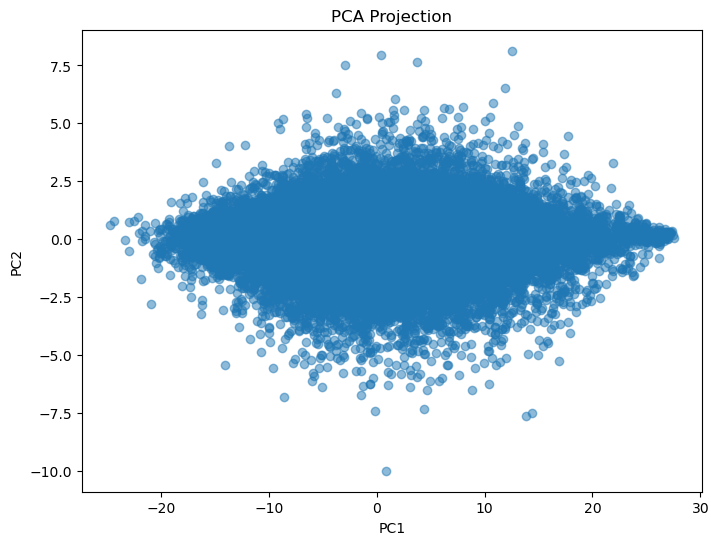

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()


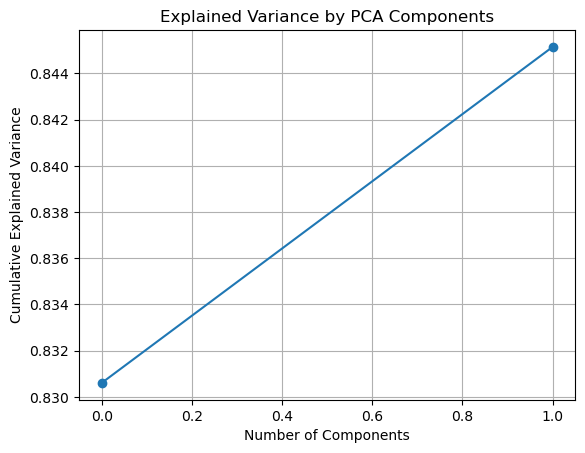

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


In [70]:
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)
print("\nFirst 5 Principal Components:\n", X_pca[:5])
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance of PC1: {explained_variance[0]:.2f}')
print(f'Explained Variance of PC2: {explained_variance[1]:.2f}')

Eigenvalues:
 [60.63533934  1.06158393  0.94524429  0.53769398  0.50900053  0.45619496
  0.40786986  0.31705516  0.27943821  0.2453556   0.24224199  0.22201497
  0.2038091   0.19780373  0.18918629  0.18664213  0.17930995  0.16799142
  0.1654633   0.15989687  0.15328491  0.1510583   0.14625982  0.14158384
  0.1385805   0.13560316  0.13207694  0.13061012  0.12853739  0.12644458
  0.12511894  0.12395447  0.12056557  0.11933357  0.11882799  0.11696107
  0.11637993  0.11578285  0.11468342  0.11222814  0.11101755  0.11026683
  0.10895286  0.10596927  0.10548192  0.10476899  0.10418769  0.10302209
  0.10225275  0.10193962  0.10046538  0.0999716   0.09875933  0.09813125
  0.09710136  0.09674527  0.0959216   0.09571163  0.09432575  0.09316922
  0.09291018  0.09092854  0.08963475  0.08744151  0.08698755  0.08606615
  0.08521561  0.08459426  0.0828366   0.08107345  0.07842366  0.07656818
  0.07348315]

Eigenvectors:
 [[-0.12013428  0.06626876  0.0151408  ... -0.47980091  0.17194688
  -0.41687012]

In [74]:
import numpy as np
import pandas as pd
df = pd.read_csv("//Users/jk/Downloads/Normalized_GSE108474_expression_data_with_ID.csv") 
df.to_csv("/Users/jk/Downloads/cleaned_normalized_gse108474_data.csv")
print("success")

success


Original dataset shape (rows, columns): (54613, 543)
Missing values in the dataset:
Unnamed: 0    0
id            0
GSM2899178    0
GSM2899179    0
GSM2899180    0
             ..
GSM2899714    0
GSM2899715    0
GSM2899716    0
GSM2899717    0
GSM2899718    0
Length: 543, dtype: int64
Numeric columns in the dataset: Index(['Unnamed: 0', 'GSM2899178', 'GSM2899179', 'GSM2899180', 'GSM2899181',
       'GSM2899182', 'GSM2899183', 'GSM2899184', 'GSM2899185', 'GSM2899186',
       ...
       'GSM2899709', 'GSM2899710', 'GSM2899711', 'GSM2899712', 'GSM2899713',
       'GSM2899714', 'GSM2899715', 'GSM2899716', 'GSM2899717', 'GSM2899718'],
      dtype='object', length=542)
Numeric-only dataset shape (rows, columns): (54613, 542)
Are there any missing values after imputation? 0


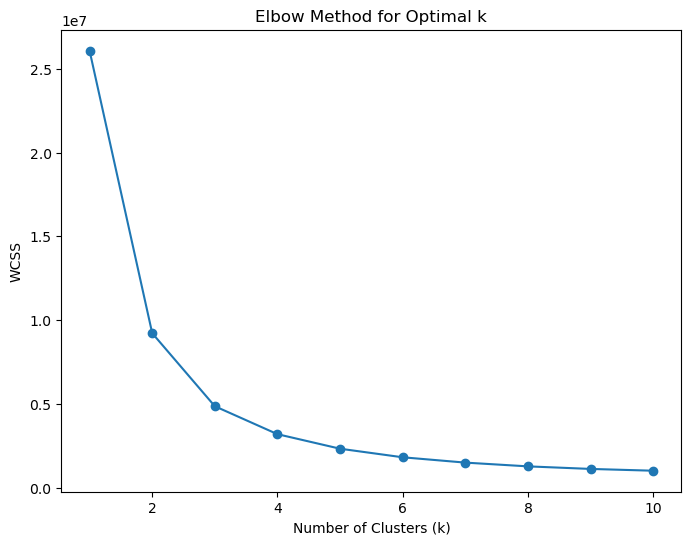

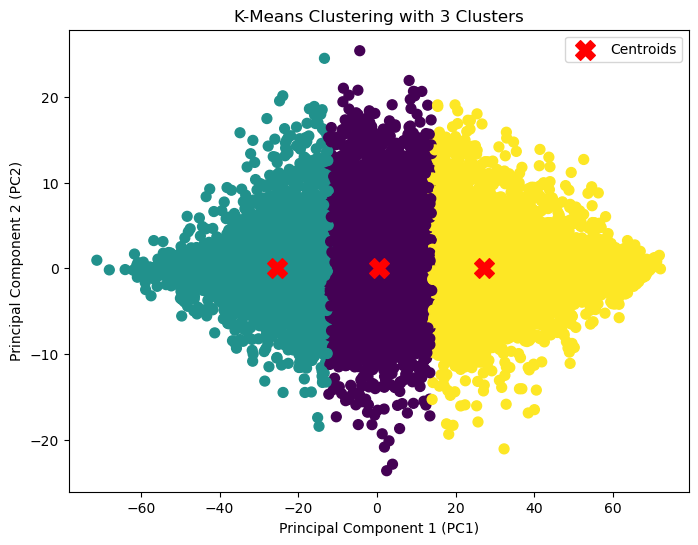

Centroids saved to 'kmeans_cluster_centroids.xlsx'
Number of points in each cluster: {0: 23884, 1: 16192, 2: 14537}


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Step 1: Load dataset
file_path = "/Users/jk/Downloads/cleaned_normalized_gse108474_data.csv"
df = pd.read_csv(file_path)

# Step 2: Check the dataset shape and missing values
print("Original dataset shape (rows, columns):", df.shape)
print("Missing values in the dataset:")
print(df.isnull().sum())

# Step 3: Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
print("Numeric columns in the dataset:", df_numeric.columns)
print("Numeric-only dataset shape (rows, columns):", df_numeric.shape)

# Step 4: Handle missing values - Fill only numeric columns with column mean
imputer = SimpleImputer(strategy='mean')
df_filled_numeric = imputer.fit_transform(df_numeric)

# Confirm missing values have been handled
print("Are there any missing values after imputation?", np.isnan(df_filled_numeric).sum())

# Step 5: Standardize the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filled_numeric)

# Step 6: Check for NaNs after scaling
if np.any(np.isnan(X_scaled)):
    print("Warning: NaN values detected after scaling. Imputing missing values again.")
    X_scaled = imputer.fit_transform(X_scaled)

# Step 7: Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 8: Elbow Method to find optimal number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Step 9: Fit final KMeans model
optimal_k = 3  # Adjust this based on elbow plot
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(X_pca)

# Step 10: Visualize the clusters
cluster_labels = kmeans_optimal.labels_
cluster_centroids = kmeans_optimal.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f"K-Means Clustering with {optimal_k} Clusters")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend()
plt.show()

# Step 11: Save centroids to Excel
centroids_df = pd.DataFrame(cluster_centroids, columns=['PC1', 'PC2'])
centroids_df.index.name = 'Cluster'
centroids_df.to_excel("kmeans_cluster_centroids.xlsx")
print("Centroids saved to 'kmeans_cluster_centroids.xlsx'")

# Step 12: Report points per cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
print(f"Number of points in each cluster: {dict(zip(unique, counts))}")


In [80]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
 # Importing Dunn Index from the dunn package

# Step 1: Calculate Silhouette Score
silhouette = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette:.4f}")

# Step 2: Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    """
    Compute the Dunn Index for clustering.
    
    Parameters:
    - X: Data points (2D array)
    - labels: Cluster labels for each data point
    
    Returns:
    - Dunn Index value
    """
    # Unique clusters
    clusters = np.unique(labels)
    
    # Step 1: Calculate the minimum distance between clusters
    min_intercluster_dist = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            # Points in clusters i and j
            cluster_i = X[labels == clusters[i]]
            cluster_j = X[labels == clusters[j]]
            
            # Calculate the distance between all pairs of points from different clusters
            dist = cdist(cluster_i, cluster_j)
            min_intercluster_dist = min(min_intercluster_dist, np.min(dist))
    
    # Step 2: Calculate the maximum diameter of the clusters
    max_intracluster_dist = -np.inf
    for i in range(len(clusters)):
        # Points in cluster i
        cluster_i = X[labels == clusters[i]]
        
        # Calculate the pairwise distances within the cluster
        dist = cdist(cluster_i, cluster_i)
        
        # Maximum distance within the cluster (diameter)
        max_intracluster_dist = max(max_intracluster_dist, np.max(dist))
    
    # Step 3: Return Dunn Index
    return min_intercluster_dist / max_intracluster_dist

# Compute Dunn Index
dunn = dunn_index(X_pca, cluster_labels)
print(f"Dunn Index: {dunn:.4f}")



Silhouette Score: 0.5070
Calinski-Harabasz Index: 119404.7608
Dunn Index: 0.0003


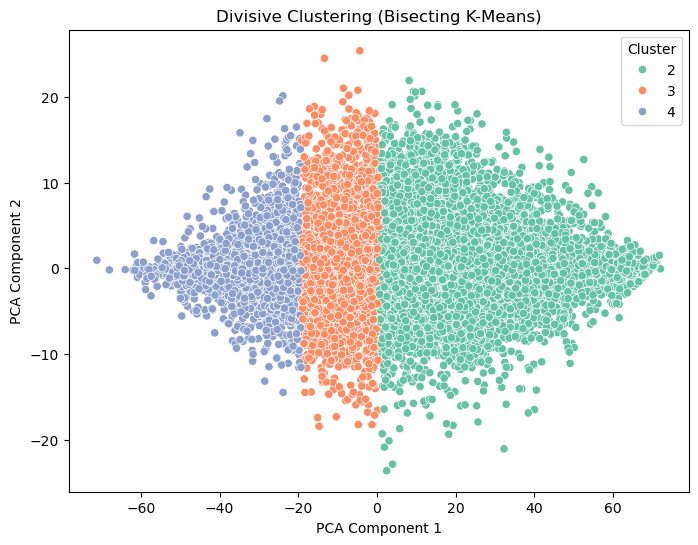

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv("/Users/jk/Downloads/cleaned_normalized_gse108474_data.csv")  # Replace with your dataset
data_numeric = data.select_dtypes(include=['number'])  # Select only numerical columns

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
data_imputed = imputer.fit_transform(data_numeric)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Apply PCA (reduce to 2 dimensions for visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# ----------------------------------
# Bisecting K-Means (Divisive Clustering)
# ----------------------------------
def bisecting_kmeans(X, target_clusters):
    n_samples = X.shape[0]
    labels = np.zeros(n_samples, dtype=int)
    clusters = [np.arange(n_samples)]
    current_label = 1

    while len(clusters) < target_clusters:
        # Find largest cluster to split
        sizes = [len(c) for c in clusters]
        idx_to_split = np.argmax(sizes)
        cluster_to_split = clusters.pop(idx_to_split).astype(int)

        # Bisect using k-means
        kmeans = KMeans(n_clusters=2, random_state=42).fit(X[cluster_to_split])
        sub_labels = kmeans.labels_

        cluster0 = cluster_to_split[sub_labels == 0]
        cluster1 = cluster_to_split[sub_labels == 1]

        labels[cluster0] = current_label
        current_label += 1
        labels[cluster1] = current_label
        current_label += 1

        clusters.append(cluster0)
        clusters.append(cluster1)

    return labels

# Choose number of clusters
n_clusters = 3
cluster_labels = bisecting_kmeans(data_pca, n_clusters)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels, palette='Set2')
plt.title("Divisive Clustering (Bisecting K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [84]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np

# Bisecting K-Means implementation
def bisecting_kmeans(X, target_clusters):
    n_samples = X.shape[0]
    labels = np.zeros(n_samples, dtype=int)
    clusters = [np.arange(n_samples)]
    current_label = 1

    while len(clusters) < target_clusters:
        sizes = [len(c) for c in clusters]
        idx_to_split = np.argmax(sizes)
        cluster_to_split = clusters.pop(idx_to_split).astype(int)

        kmeans = KMeans(n_clusters=2, random_state=42).fit(X[cluster_to_split])
        sub_labels = kmeans.labels_

        cluster0 = cluster_to_split[sub_labels == 0]
        cluster1 = cluster_to_split[sub_labels == 1]

        labels[cluster0] = current_label
        current_label += 1
        labels[cluster1] = current_label
        current_label += 1

        clusters.append(cluster0)
        clusters.append(cluster1)

    return labels

# Dunn Index function
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    min_intercluster = np.inf
    max_intracluster = 0

    for i in unique_clusters:
        cluster_i = X[labels == i]
        for j in unique_clusters:
            if i != j:
                cluster_j = X[labels == j]
                if len(cluster_i) > 0 and len(cluster_j) > 0:
                    inter_dist = np.min(cdist(cluster_i, cluster_j))
                    min_intercluster = min(min_intercluster, inter_dist)

        if len(cluster_i) > 1:
            intra_dist = np.max(cdist(cluster_i, cluster_i))
            max_intracluster = max(max_intracluster, intra_dist)

    if max_intracluster == 0:
        return np.nan
    return min_intercluster / max_intracluster


# Number of clusters
n_clusters = 3

# Apply divisive clustering
cluster_labels = bisecting_kmeans(data_pca, n_clusters)

# Compute evaluation metrics
silhouette = silhouette_score(data_pca, cluster_labels)
calinski = calinski_harabasz_score(data_pca, cluster_labels)
dunn = dunn_index(data_pca, cluster_labels)

# Print scores
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.4f}")
print(f"Dunn Index: {dunn:.4f}")


Silhouette Score: 0.4560
Calinski-Harabasz Index: 87267.4487
Dunn Index: 0.0002


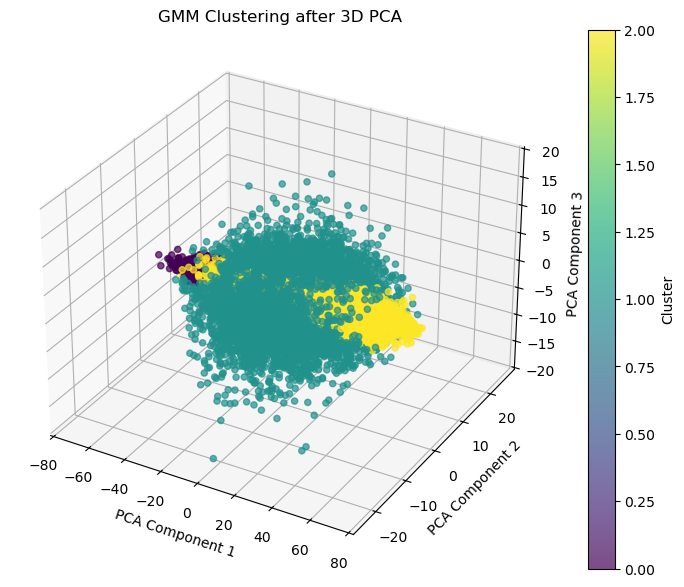

Silhouette Score: 0.1368
Calinski-Harabasz Index: 19227.9732
Dunn Index: 0.0003


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# -----------------------
# Dunn Index Function
# -----------------------
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    min_intercluster = np.inf
    max_intracluster = 0

    for i in unique_clusters:
        cluster_i = X[labels == i]
        for j in unique_clusters:
            if i != j:
                cluster_j = X[labels == j]
                if len(cluster_i) > 0 and len(cluster_j) > 0:
                    inter_dist = np.min(cdist(cluster_i, cluster_j))
                    min_intercluster = min(min_intercluster, inter_dist)

        if len(cluster_i) > 1:
            intra_dist = np.max(cdist(cluster_i, cluster_i))
            max_intracluster = max(max_intracluster, intra_dist)

    if max_intracluster == 0:
        return np.nan
    return min_intercluster / max_intracluster

# -----------------------
# Load & Preprocess Data
# -----------------------
data = pd.read_csv("/Users/jk/Downloads/cleaned_normalized_gse108474_data.csv")
data_numeric = data.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

data_scaled = np.nan_to_num(data_scaled)

# -----------------------
# PCA (3D) and GMM Clustering
# -----------------------
if np.var(data_scaled) > 0:
    pca_3d = PCA(n_components=3)
    data_pca_3d = pca_3d.fit_transform(data_scaled)
else:
    raise ValueError("Data has zero variance, PCA cannot be applied.")

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_pca_3d)
labels = gmm.predict(data_pca_3d)

# -----------------------
# Plot 3D Clusters
# -----------------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2],
                     c=labels, cmap='viridis', alpha=0.7)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("GMM Clustering after 3D PCA")
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()

# -----------------------
# Calculate Clustering Metrics
# -----------------------
silhouette = silhouette_score(data_pca_3d, labels)
calinski = calinski_harabasz_score(data_pca_3d, labels)
dunn = dunn_index(data_pca_3d, labels)

# Print metrics
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.4f}")
print(f"Dunn Index: {dunn:.4f}")


In [90]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.impute import SimpleImputer


# Load data
data_108474 = pd.read_csv("/Users/jk/Downloads/cleaned_normalized_gse108474_data.csv")

# Clean column names
data_108474.columns = data_108474.columns.str.strip()

# Identify ID column (adjust if needed)
possible_id_cols = ['Gene_ID', 'Unnamed: 0', 'Unnamed: 0.1', 'id']
id_col = next((col for col in data_108474.columns if col in possible_id_cols), None)

if id_col is None:
    raise ValueError("No valid ID column found. Checked: " + ", ".join(possible_id_cols))

# Extract IDs
ids = data_108474[id_col]

# Drop ID column to get expression data
expression_data = data_108474.drop(columns=[id_col])

# Keep only numeric columns for clustering
expression_data_numeric = expression_data.select_dtypes(include=['number'])

# Impute missing values (mean)
imputer = SimpleImputer(strategy='mean')
expression_data_imputed = imputer.fit_transform(expression_data_numeric)

# Run KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(expression_data_imputed)

# Get centroids and closest genes
centroids = kmeans.cluster_centers_
closest_indices, distances = pairwise_distances_argmin_min(centroids, expression_data_imputed)

# Result DataFrame
centroid_genes = pd.DataFrame({
    'cluster': range(3),
    'closest_gene_id': ids.iloc[closest_indices].values,
    'distance_to_centroid': distances
})

# Save to Excel
output_path = "kmeans_centroid_genes_k3.xlsx"
centroid_genes.to_excel(output_path, index=False)

# Display
centroid_genes


,cluster,closest_gene_id,distance_to_centroid
0,0,39959,0.368167
1,1,52540,0.378404
2,2,29223,0.314372
